In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utils

from utils import local_data
from utils import window
from utils import Scale

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))

In [3]:
df_station

identificationstation alias    height   latitude  \
city_name_correct                                                      
Belo Horizonte                        bhz  null   858.000 -19.868500   
Brasília                              bsa  null  1050.000 -15.764200   
Cachoeira Paulista                    cpa  null   580.000 -22.410000   
Campo Grande                           32  cg01       NaN -20.497000   
Cuiabá                                cub  null   278.000 -15.555200   
Dourados                              dou  null   756.120 -22.110000   
Fortaleza                              24  fort       NaN  -3.742000   
Guaratinguetá                          33  eear       NaN -22.789000   
Ilhéus                                ios  null     0.000 -14.470000   
Inconfidentes                          25  inco       NaN -22.318000   
Macaé                                  11  maca       NaN -22.823000   
Natal                                 nta  null     0.000  -5.836162   
Palmas                                  3  palm       NaN -10.200000   
Pirassununga                           30  afae       NaN -21.989000   
Porto Alegre                            4  poal       NaN -30.071000   
Presidente Prudente                     6  prut       NaN -22.120000   
Rio de Janeiro                         34  gw01       NaN -22.823000   
Salvador                               26  ufba       NaN -13.001000   
Santa Maria                           sta  null   110.100 -29.712591   
São José dos Campos                   sj2  sjcu   593.440 -23.207000   
Tefé                                  tfe  null     0.057  -3.180000   

                     longitude     network state  \
city_name_correct                                  
Belo Horizonte      -43.954200        lisn    mg   
Brasília            -47.869400        lisn    df   
Cachoeira Paulista  -45.000000        lisn    sp   
Campo Grande        -54.615000  septentrio    ms   
Cuiabá              -56.069800        lisn    mt   
Dourados            -54.550000        lisn    ms   
Fortaleza           -38.539000  septentrio    ce   
Guaratinguetá       -45.220000  septentrio    sp   
Ilhéus              -39.100000        lisn    ba   
Inconfidentes       -46.329000  septentrio    mg   
Macaé               -41.785700  septentrio    rj   
Natal               -35.121000        lisn    rn   
Palmas              -48.312000  septentrio    ro   
Pirassununga        -47.334000  septentrio    sp   
Porto Alegre        -51.119000  septentrio    rs   
Presidente Prudente -51.407000  septentrio    sp   
Rio de Janeiro      -43.238000  septentrio    rj   
Salvador            -38.508000  septentrio    ba   
Santa Maria         -53.717206        lisn    rs   
São José dos Campos -45.859000  septentrio    sp   
Tefé                -64.440000        lisn    am   

                                                         city  startoperation  \
city_name_correct                                                               
Belo Horizonte                                 belo horizonte             NaN   
Brasília                                             brasilia             NaN   
Cachoeira Paulista                         cachoeira paulista             NaN   
Campo Grande                                    campos grande             NaN   
Cuiabá                                                 cuiaba             NaN   
Dourados                                             dourados             NaN   
Fortaleza                                           fortaleza             NaN   
Guaratinguetá                                  guaratinguestá             NaN   
Ilhéus                                                 ilheus             NaN   
Inconfidentes                                   inconfidentes             NaN   
Macaé                                                   macaé             NaN   
Natal                                                   natal             NaN   
Palmas                          

In [4]:
for i in df_series_vtec.columns:
    # to vtec data
    value_min_vtec = df_series_vtec[i].min()
    value_max_vtec = df_series_vtec[i].max()
    
    print(i)
    print('Valor mínimo de vtec:', value_min_vtec)
    print('Valor máximo de vtec:', value_max_vtec)
    
    scale_vtec = Scale(value_min_vtec, value_max_vtec)
    df_series_vtec[i] = scale_vtec(df_series_vtec[i].values.ravel())

    value_min_s4 = df_series_s4[i].min()
    value_max_s4 = df_series_s4[i].max()
    
    print('Valor mínimo de s4:', value_min_s4)
    print('Valor máximo de s4:', value_max_s4, '\n')

    scale_s4 = Scale(value_min_s4, value_max_s4)
    df_series_s4[i] = scale_s4(df_series_s4[i].values.ravel())

bhz
Valor mínimo de vtec: -7.1324416994958435
Valor máximo de vtec: 104.75526711288282
Valor mínimo de s4: 0.11634979351718157
Valor máximo de s4: 0.7488835948820218 

bsa
Valor mínimo de vtec: -20.50731191635348
Valor máximo de vtec: 96.4544051468108
Valor mínimo de s4: 0.12117806621539207
Valor máximo de s4: 0.6711873158365351 

cpa
Valor mínimo de vtec: -5.564354141724401
Valor máximo de vtec: 103.54572412981098
Valor mínimo de s4: 0.1215053331663906
Valor máximo de s4: 0.7855827684054516 

32
Valor mínimo de vtec: -15.580946045324858
Valor máximo de vtec: 95.8051207077549
Valor mínimo de s4: 0.04149761135310729
Valor máximo de s4: 0.4145779614817901 

cub
Valor mínimo de vtec: -8.173769920834465
Valor máximo de vtec: 88.25195034226157
Valor mínimo de s4: 0.11745012458963444
Valor máximo de s4: 0.4337569278945517 

dou
Valor mínimo de vtec: -15.491598163667017
Valor máximo de vtec: 98.10777104796152
Valor mínimo de s4: 0.10736307148528067
Valor máximo de s4: 0.6443606525932344 

24


In [5]:
df_series_vtec.head()

bhz       bsa       cpa        32      cub  \
2013-12-01 00:00:00+00:00       NaN       NaN       NaN       NaN      NaN   
2013-12-01 00:10:00+00:00       NaN       NaN       NaN       NaN      NaN   
2013-12-01 00:20:00+00:00       NaN       NaN       NaN       NaN      NaN   
2013-12-01 00:30:00+00:00       NaN       NaN       NaN       NaN      NaN   
2013-12-01 00:40:00+00:00  0.497833  0.539746  0.519319  0.686675  0.46778   

                                dou        24        33       ios        25  \
2013-12-01 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:10:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:20:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:30:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:40:00+00:00  0.637879  0.377334  0.529963  0.257098  0.564434   

                             ...          nta         3        30         4  \
2013-12-01 00:00:00+00:00    ...          NaN       NaN       NaN       NaN   
2013-12-01 00:10:00+00:00    ...          NaN       NaN       NaN       NaN   
2013-12-01 00:20:00+00:00    ...          NaN       NaN       NaN       NaN   
2013-12-01 00:30:00+00:00    ...          NaN       NaN       NaN       NaN   
2013-12-01 00:40:00+00:00    ...     0.440446  0.216042  0.609206  0.377197   

                                  6        34        26      sta       sj2  \
2013-12-01 00:00:00+00:00       NaN       NaN       NaN      NaN       NaN   
2013-12-01 00:10:00+00:00       NaN       NaN       NaN      NaN       NaN   
2013-12-01 00:20:00+00:00       NaN       NaN       NaN      NaN       NaN   
2013-12-01 00:30:00+00:00       NaN       NaN       NaN      NaN       NaN   
2013-12-01 00:40:00+00:00  0.678016  0.460729  0.278992  0.34867  0.536539   

                                tfe  
2013-12-01 00:00:00+00:00       NaN  
2013-12-01 00:10:00+00:00       NaN  
2013-12-01 00:20:00+00:00       NaN  
2013-12-01 00:30:00+00:00       NaN  
2013-12-01 00:40:00+00:00  0.383429  

[5 rows x 21 columns]

In [6]:
df_series_s4.head()

bhz       bsa       cpa  32       cub       dou  \
2013-12-01 00:00:00  0.727435  0.463484  0.611755 NaN  0.469004  0.603374   
2013-12-01 00:10:00  0.700369  0.502424  0.656426 NaN  0.482190  0.556901   
2013-12-01 00:20:00  0.668830  0.566489  0.677760 NaN  0.508317  0.520577   
2013-12-01 00:30:00  0.635792  0.604023  0.670306 NaN  0.558595  0.501011   
2013-12-01 00:40:00  0.603167  0.581491  0.652216 NaN  0.620131  0.472732   

                           24  33       ios        25 ...        nta  \
2013-12-01 00:00:00  0.111357 NaN  0.699360  0.024705 ...   0.495034   
2013-12-01 00:10:00  0.111358 NaN  0.621206  0.019529 ...   0.462043   
2013-12-01 00:20:00  0.111360 NaN  0.547458  0.017110 ...   0.394834   
2013-12-01 00:30:00  0.111361 NaN  0.486281  0.015696 ...   0.311930   
2013-12-01 00:40:00  0.111362 NaN  0.451603  0.016055 ...   0.241898   

                            3  30         4         6  34        26       sta  \
2013-12-01 00:00:00  0.063877 NaN  0.020371  0.032501 NaN  0.098446  0.066780   
2013-12-01 00:10:00  0.057686 NaN  0.019494  0.032680 NaN  0.098446  0.066379   
2013-12-01 00:20:00  0.063833 NaN  0.019465  0.032203 NaN  0.098445  0.063179   
2013-12-01 00:30:00  0.105203 NaN  0.020488  0.030103 NaN  0.098445  0.059734   
2013-12-01 00:40:00  0.186751 NaN  0.023556  0.031145 NaN  0.098445  0.056741   

                          sj2  tfe  
2013-12-01 00:00:00  0.404828  NaN  
2013-12-01 00:10:00  0.407307  NaN  
2013-12-01 00:20:00  0.359895  NaN  
2013-12-01 00:30:00  0.299442  NaN  
2013-12-01 00:40:00  0.259476  NaN  

[5 rows x 21 columns]

# Plots

In [7]:
size = df_series_vtec.columns.size//3
groups = []
for i in range (0, 21, 7):
    groups.append(df_series_vtec.columns.ravel()[i:i+7])

In [ ]:
figsize = (24, 40)
latter_size = 14

## Amostra da Série

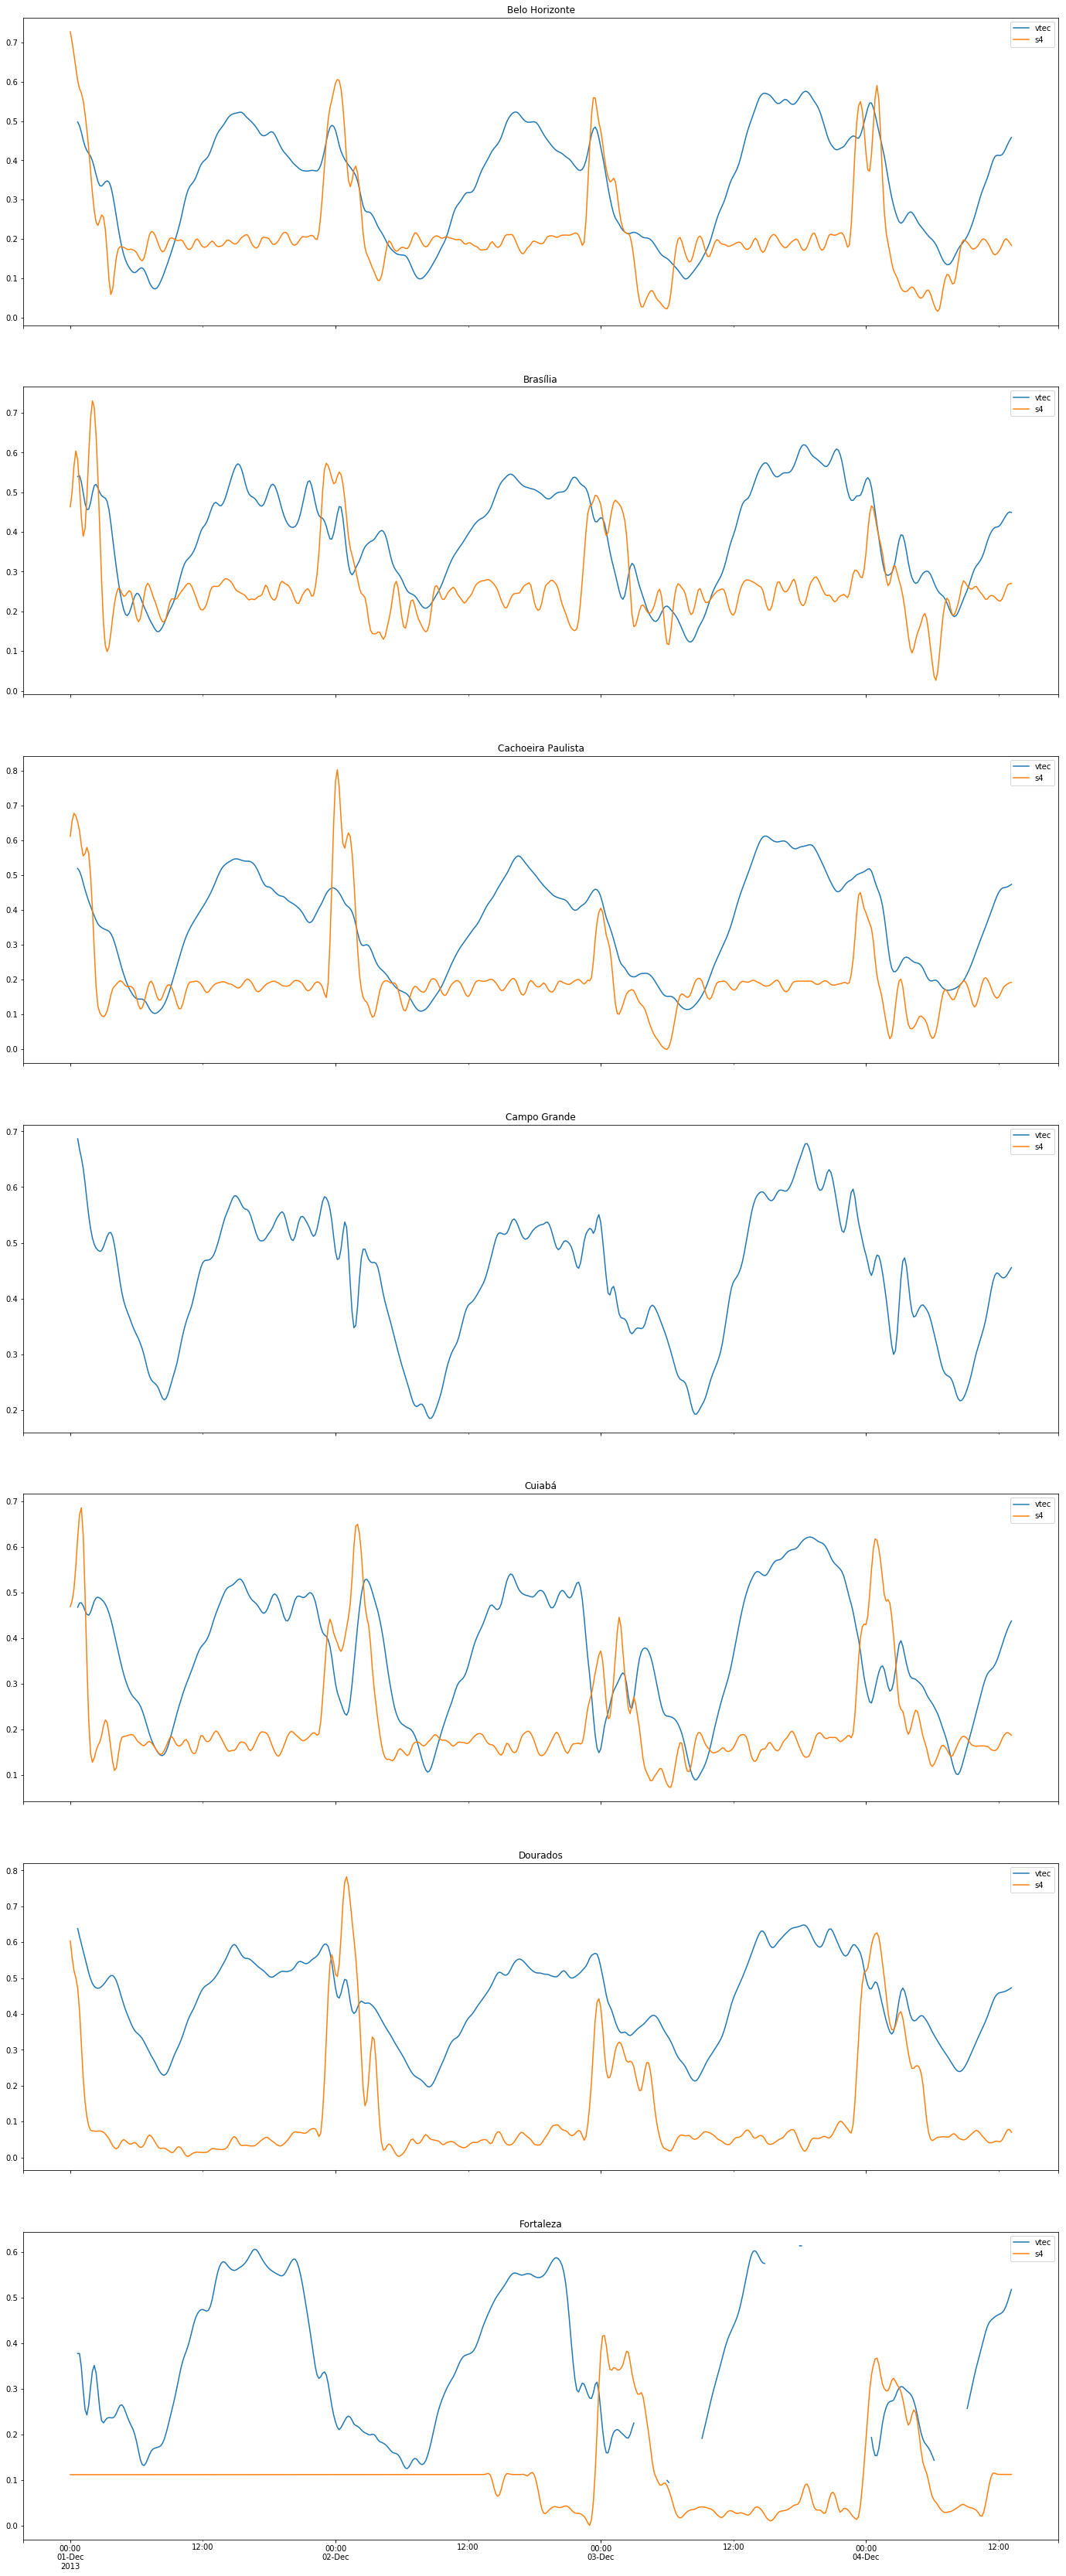

In [8]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[0]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:512].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][0:512].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name)
    ax[idx].legend(loc="upper right", prop={'size': latter_size})
    ax[idx].tick_params(axis='both', which='both', labelsize=latter_size)
plt.tight_layout()
plt.savefig('./images/s4_vtec_sample0.eps', format='eps', dpi=1000)

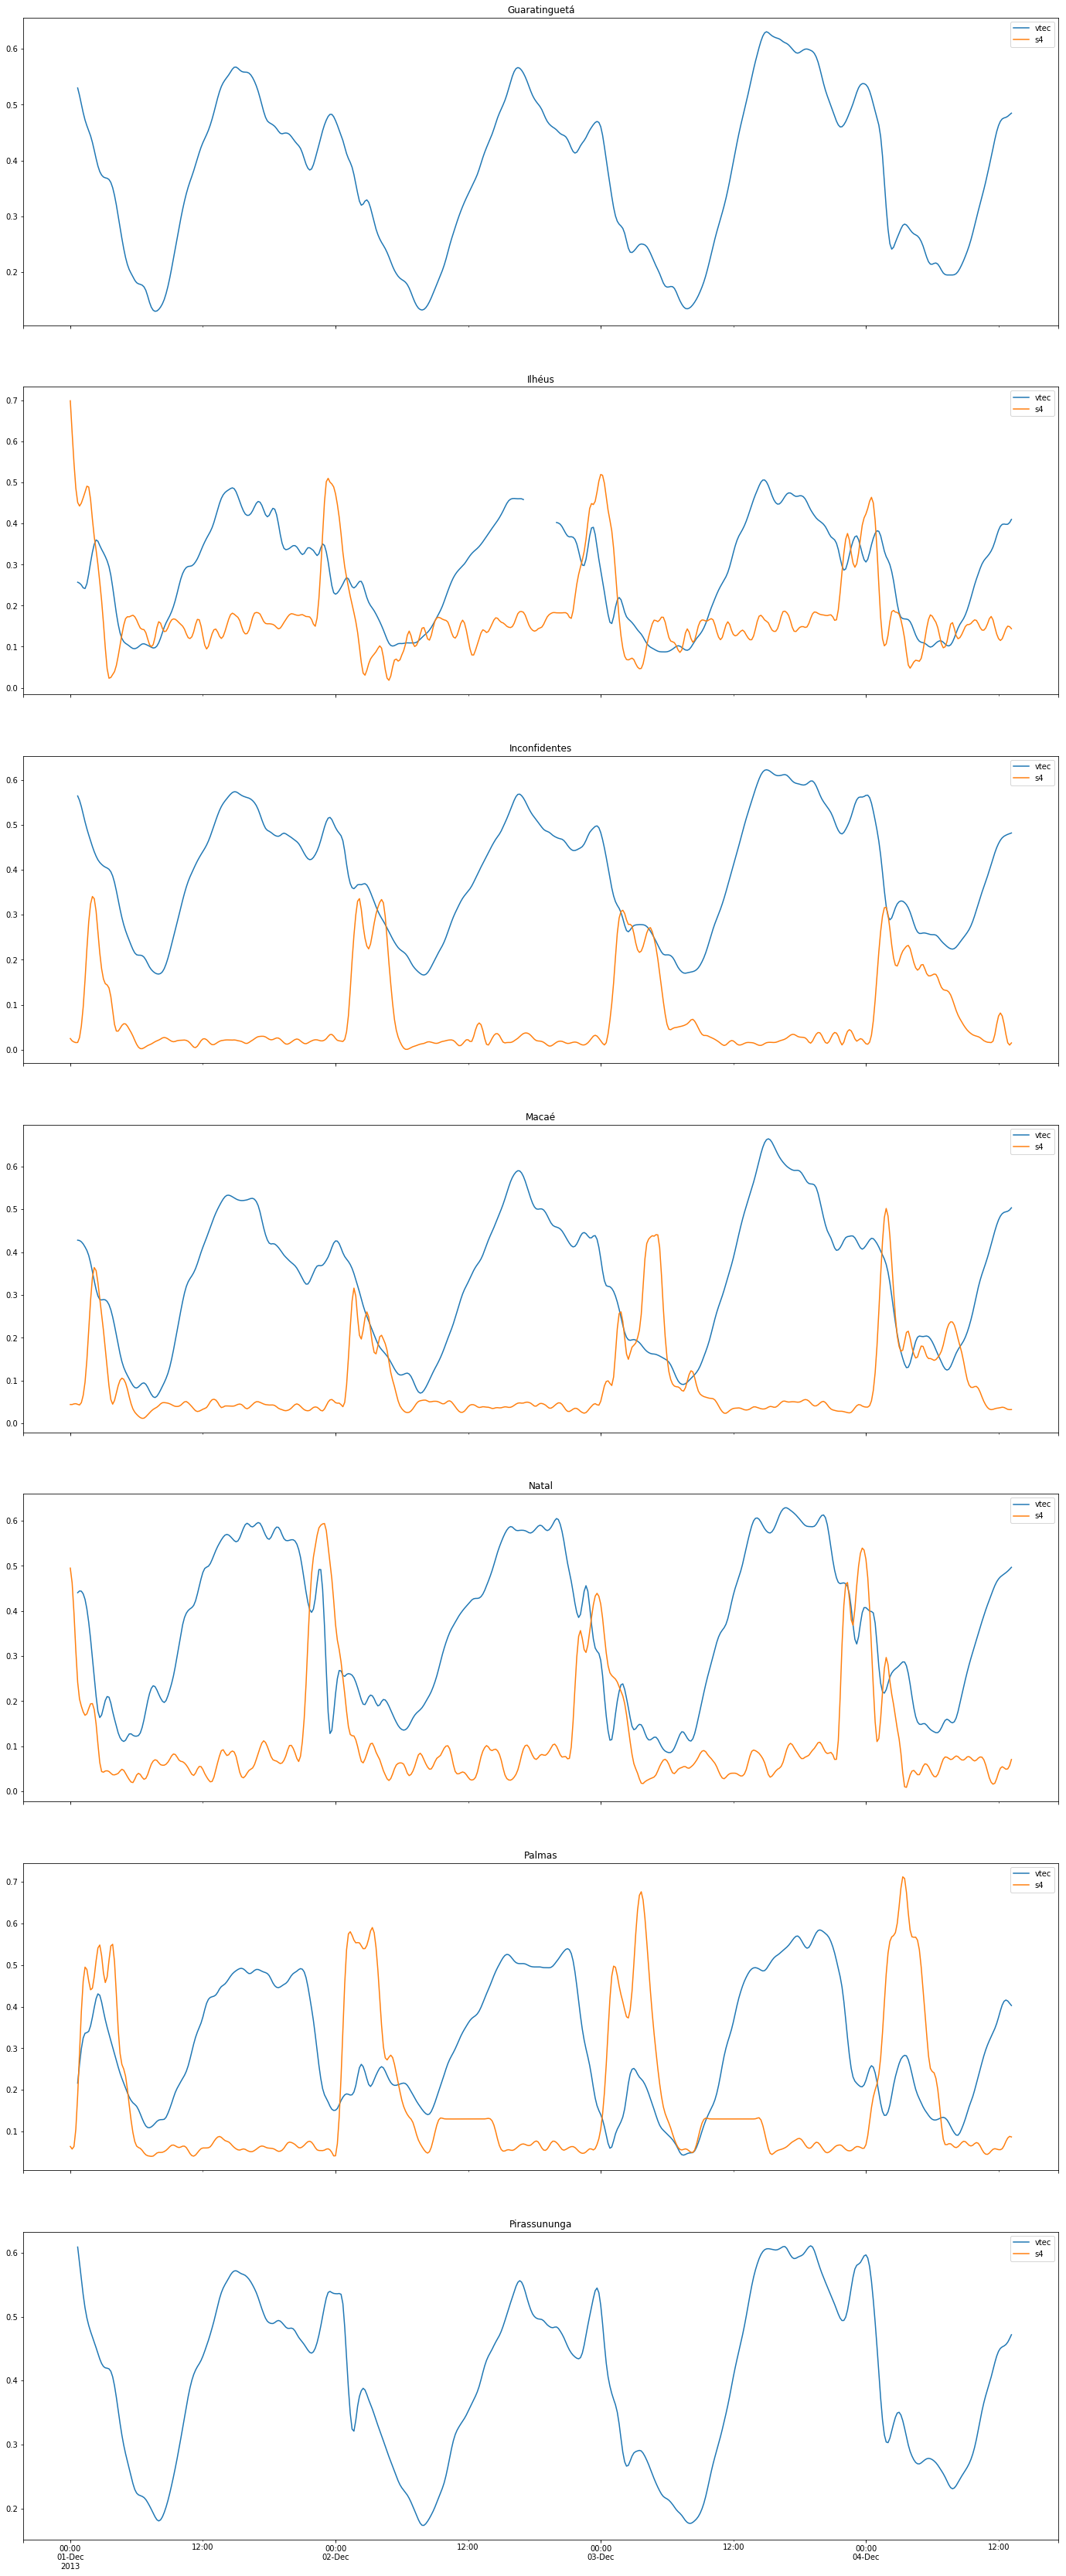

In [9]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[2]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:512].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][0:512].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name)
    ax[idx].legend(loc="upper right", prop={'size': latter_size})
    ax[idx].tick_params(axis='both', which='both', labelsize=latter_size)
plt.tight_layout()
plt.savefig('./images/s4_vtec_sample1.eps', format='eps', dpi=1000)

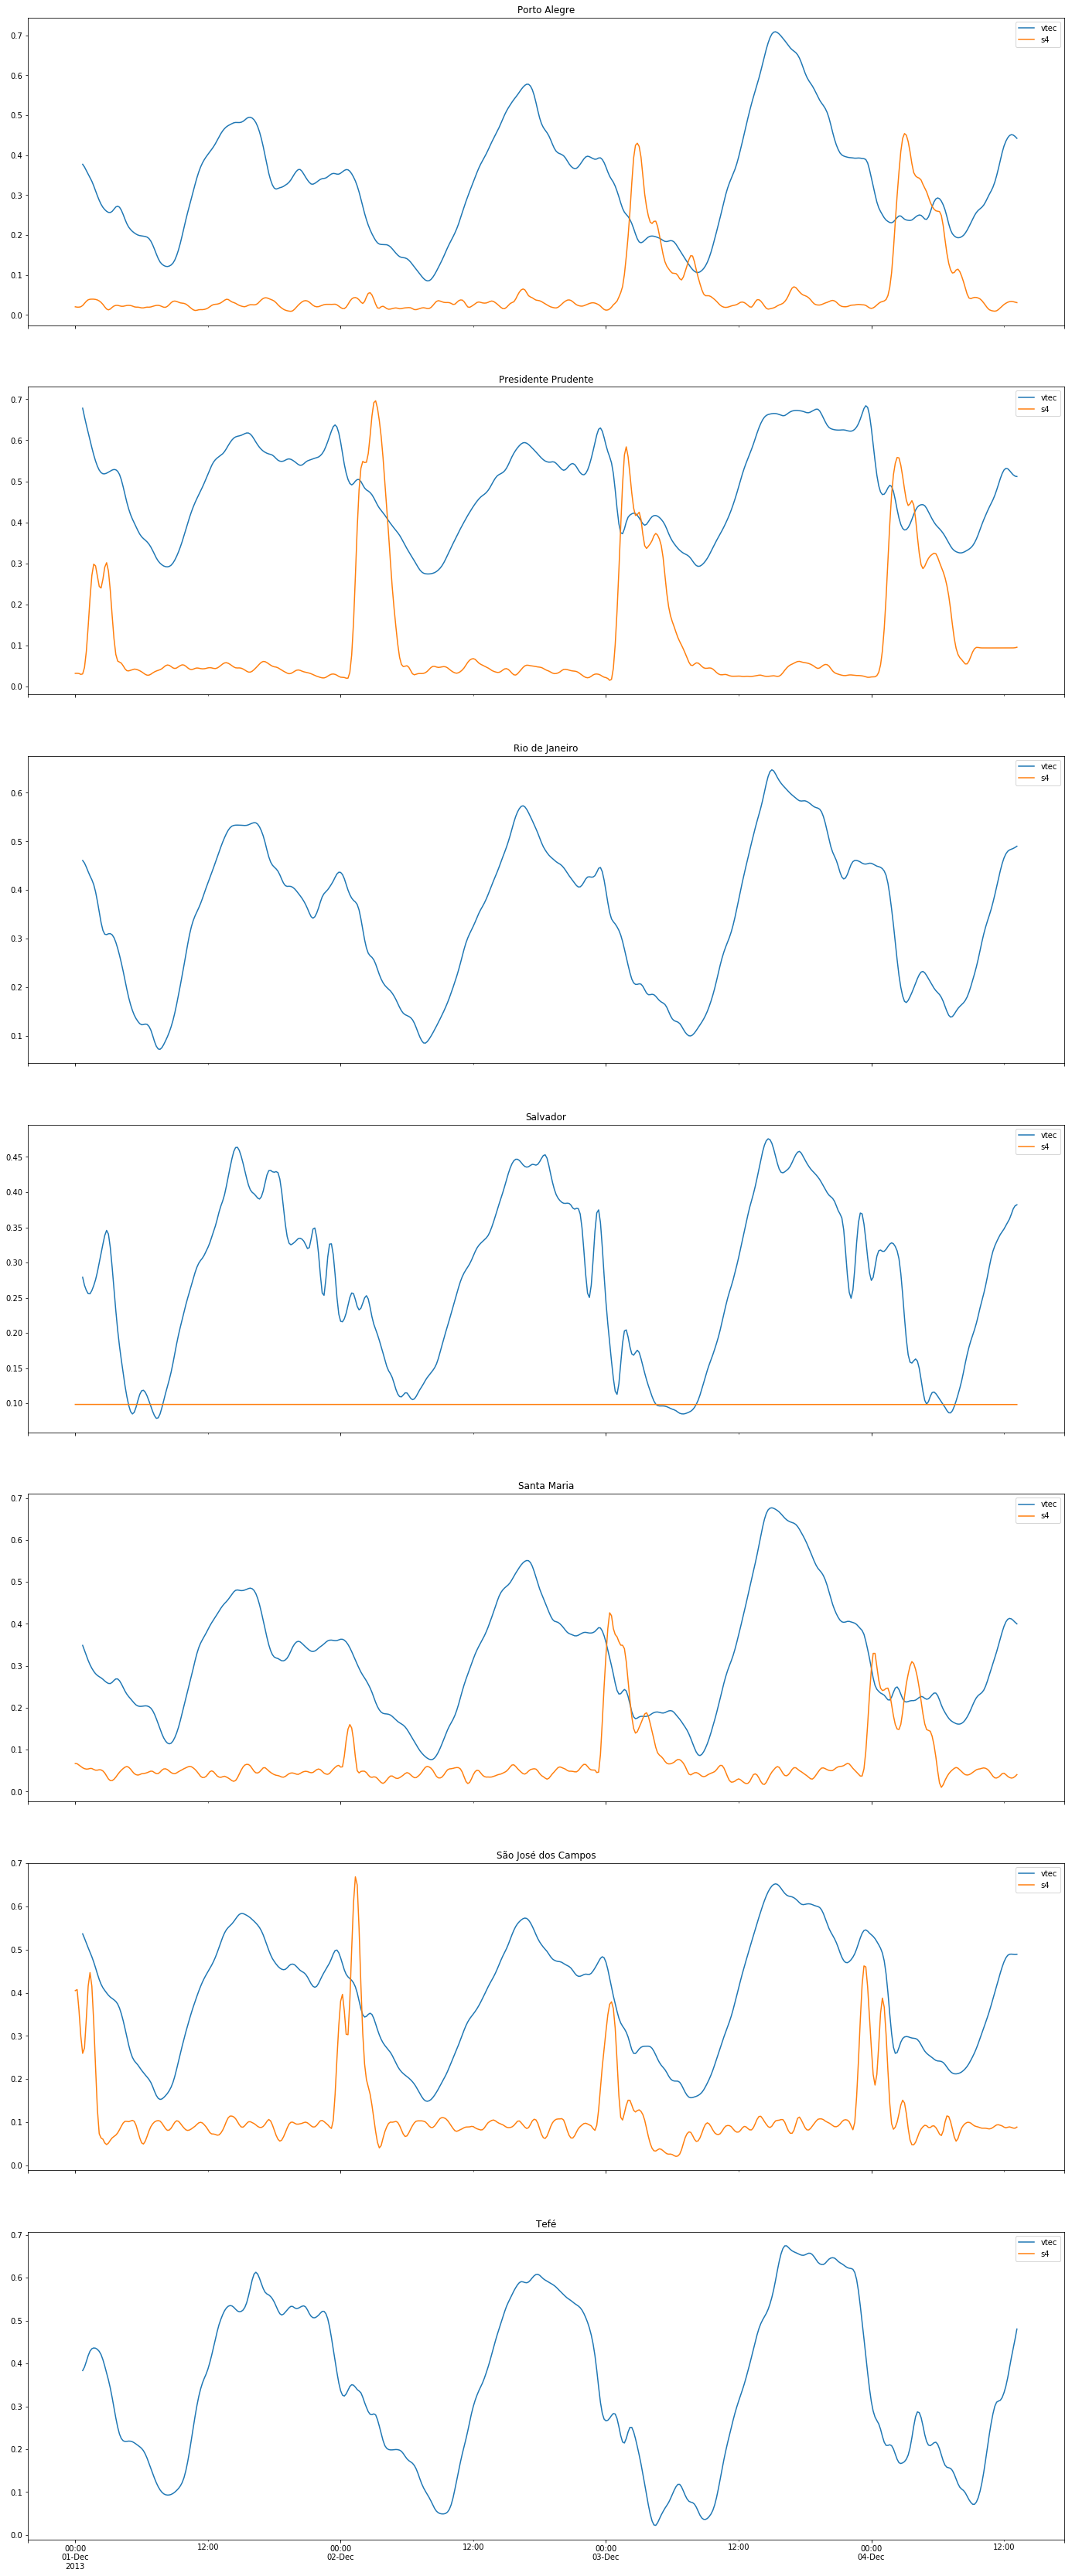

In [10]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[1]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:512].plot(figsize=figsize, ax=ax[idx], label='vtec')
    df_series_s4[i][0:512].plot(figsize=figsize, ax=ax[idx], label='s4')
    ax[idx].set_title(name)
    ax[idx].legend(loc="upper right", prop={'size': latter_size})
    ax[idx].tick_params(axis='both', which='both', labelsize=latter_size)
plt.tight_layout()
plt.savefig('./images/s4_vtec_sample2.eps', format='eps', dpi=1000)

In [11]:
## Série completa

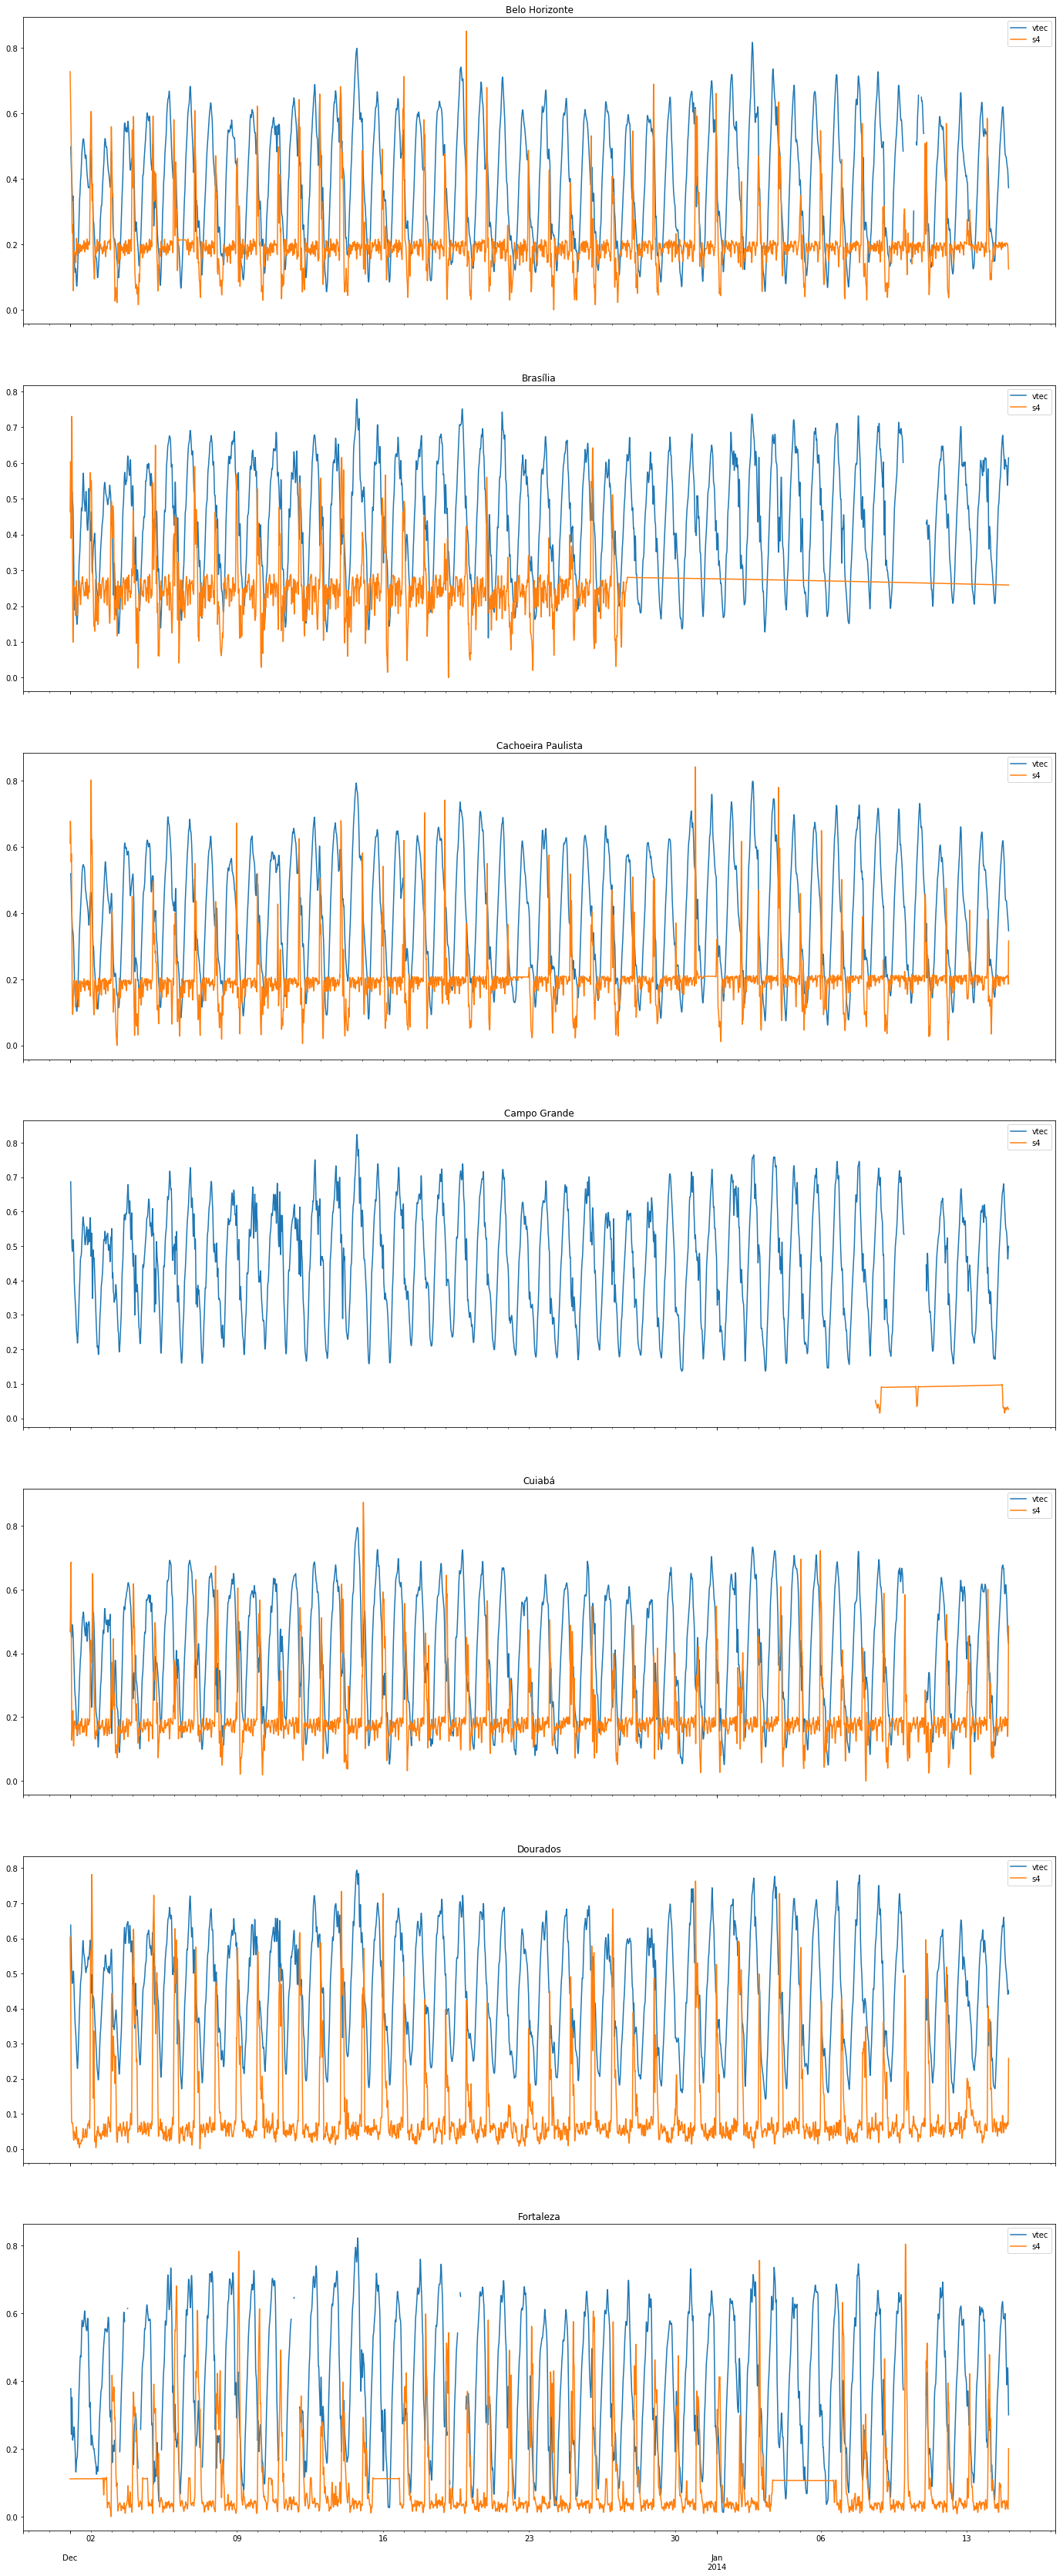

In [12]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[0]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:6480].plot(figsize=(24, 60), ax=ax[idx], label='vtec')
    df_series_s4[i][0:6480].plot(figsize=(24, 60), ax=ax[idx], label='s4')
    ax[idx].set_title(name)
    ax[idx].legend(loc="upper right")
plt.savefig('./images/s4_vtec_complete1.eps', format='eps', dpi=1000)

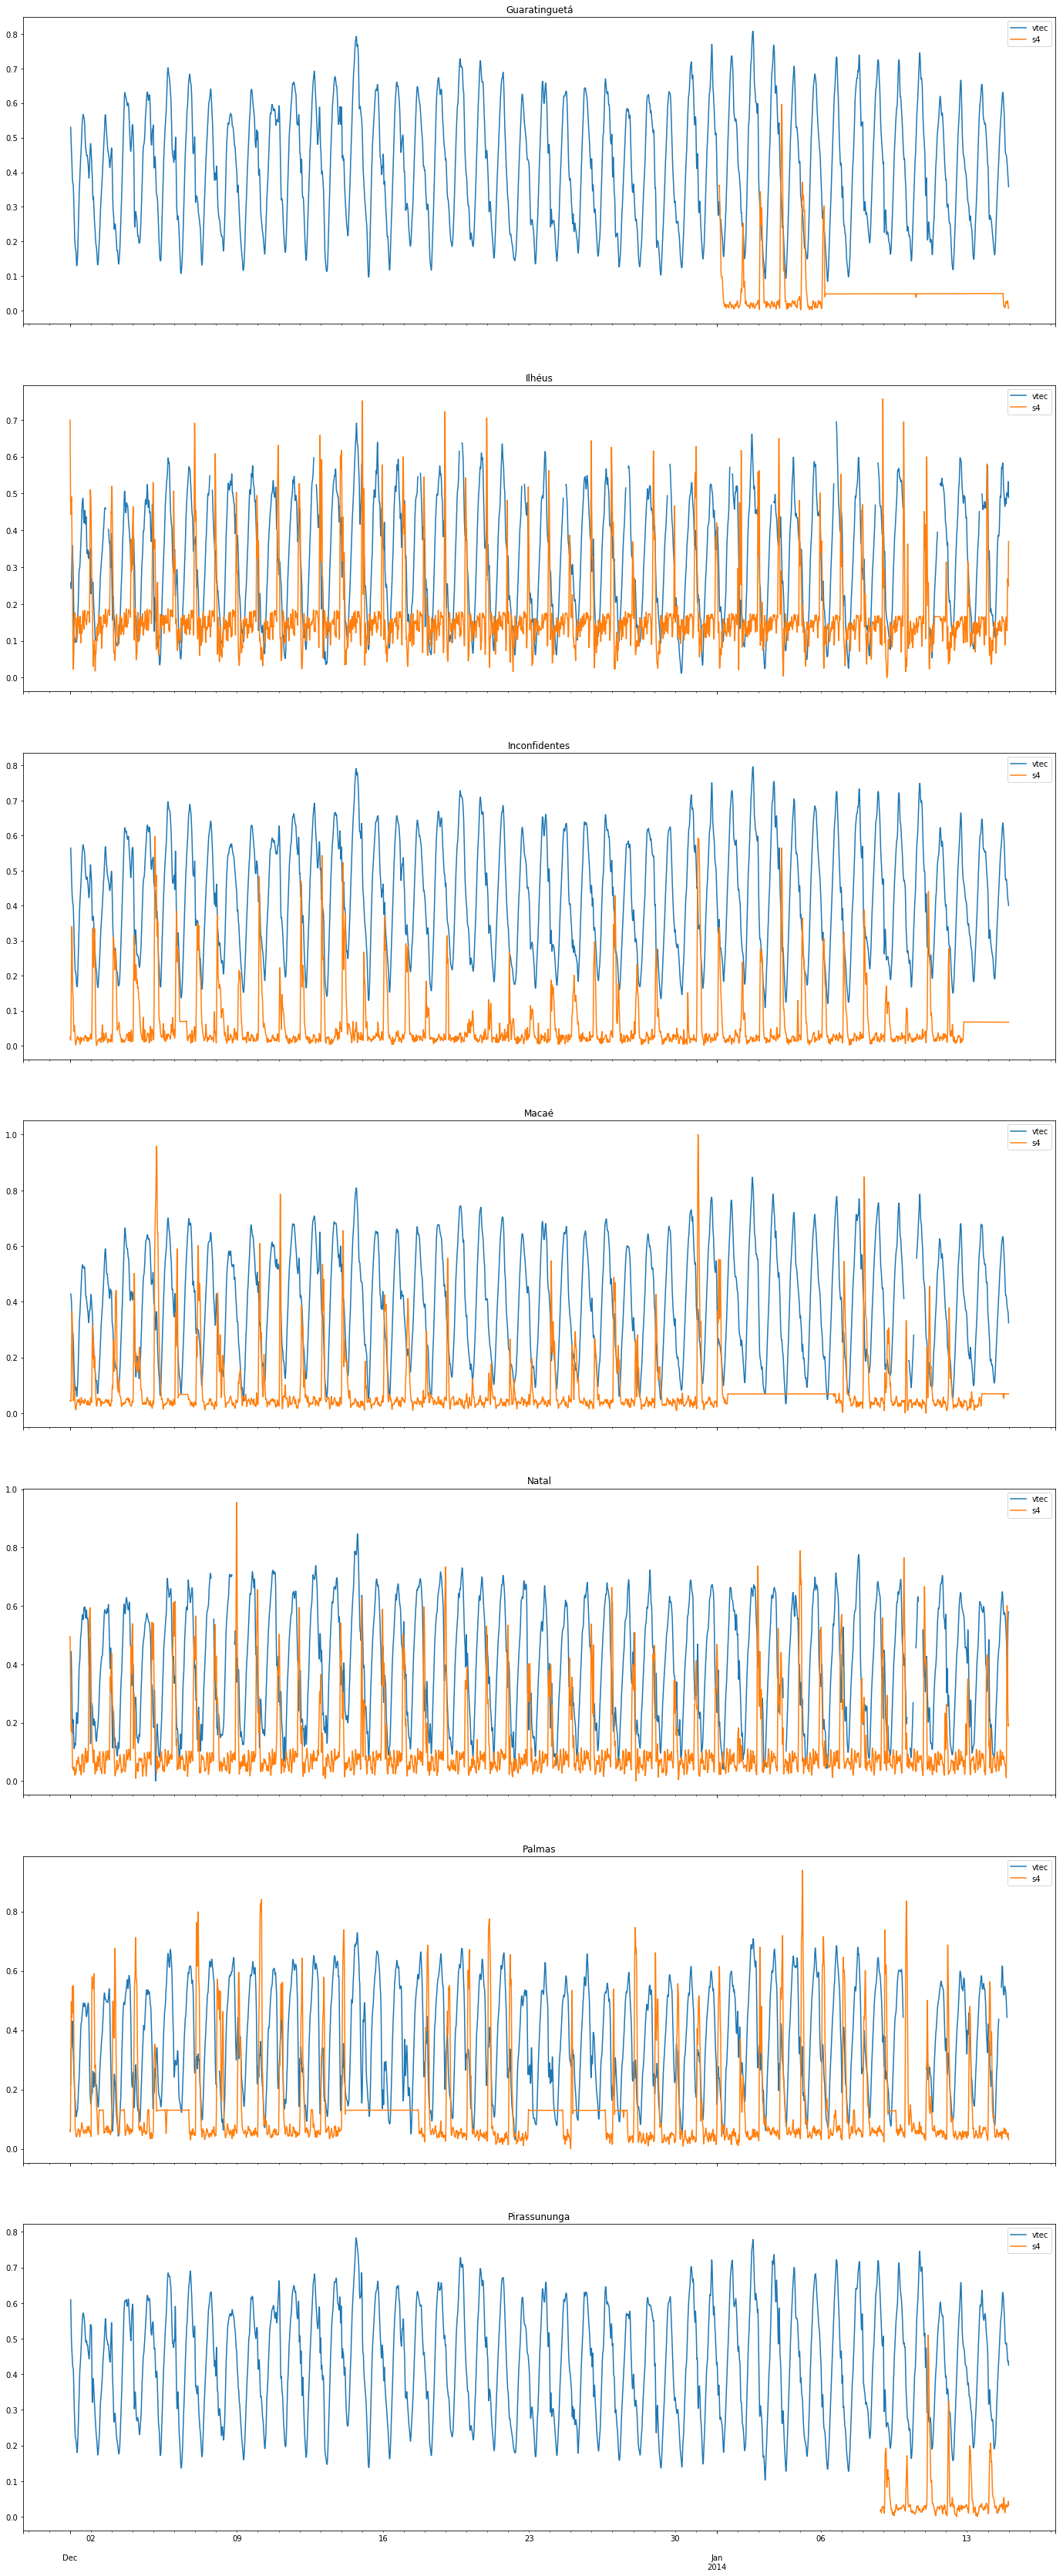

In [13]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[1]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:6480].plot(figsize=(24, 60), ax=ax[idx], label='vtec')
    df_series_s4[i][0:6480].plot(figsize=(24, 60), ax=ax[idx], label='s4')
    ax[idx].set_title(name)
    ax[idx].legend(loc="upper right")
plt.savefig('./images/s4_vtec_complete1.eps', format='eps', dpi=1000)

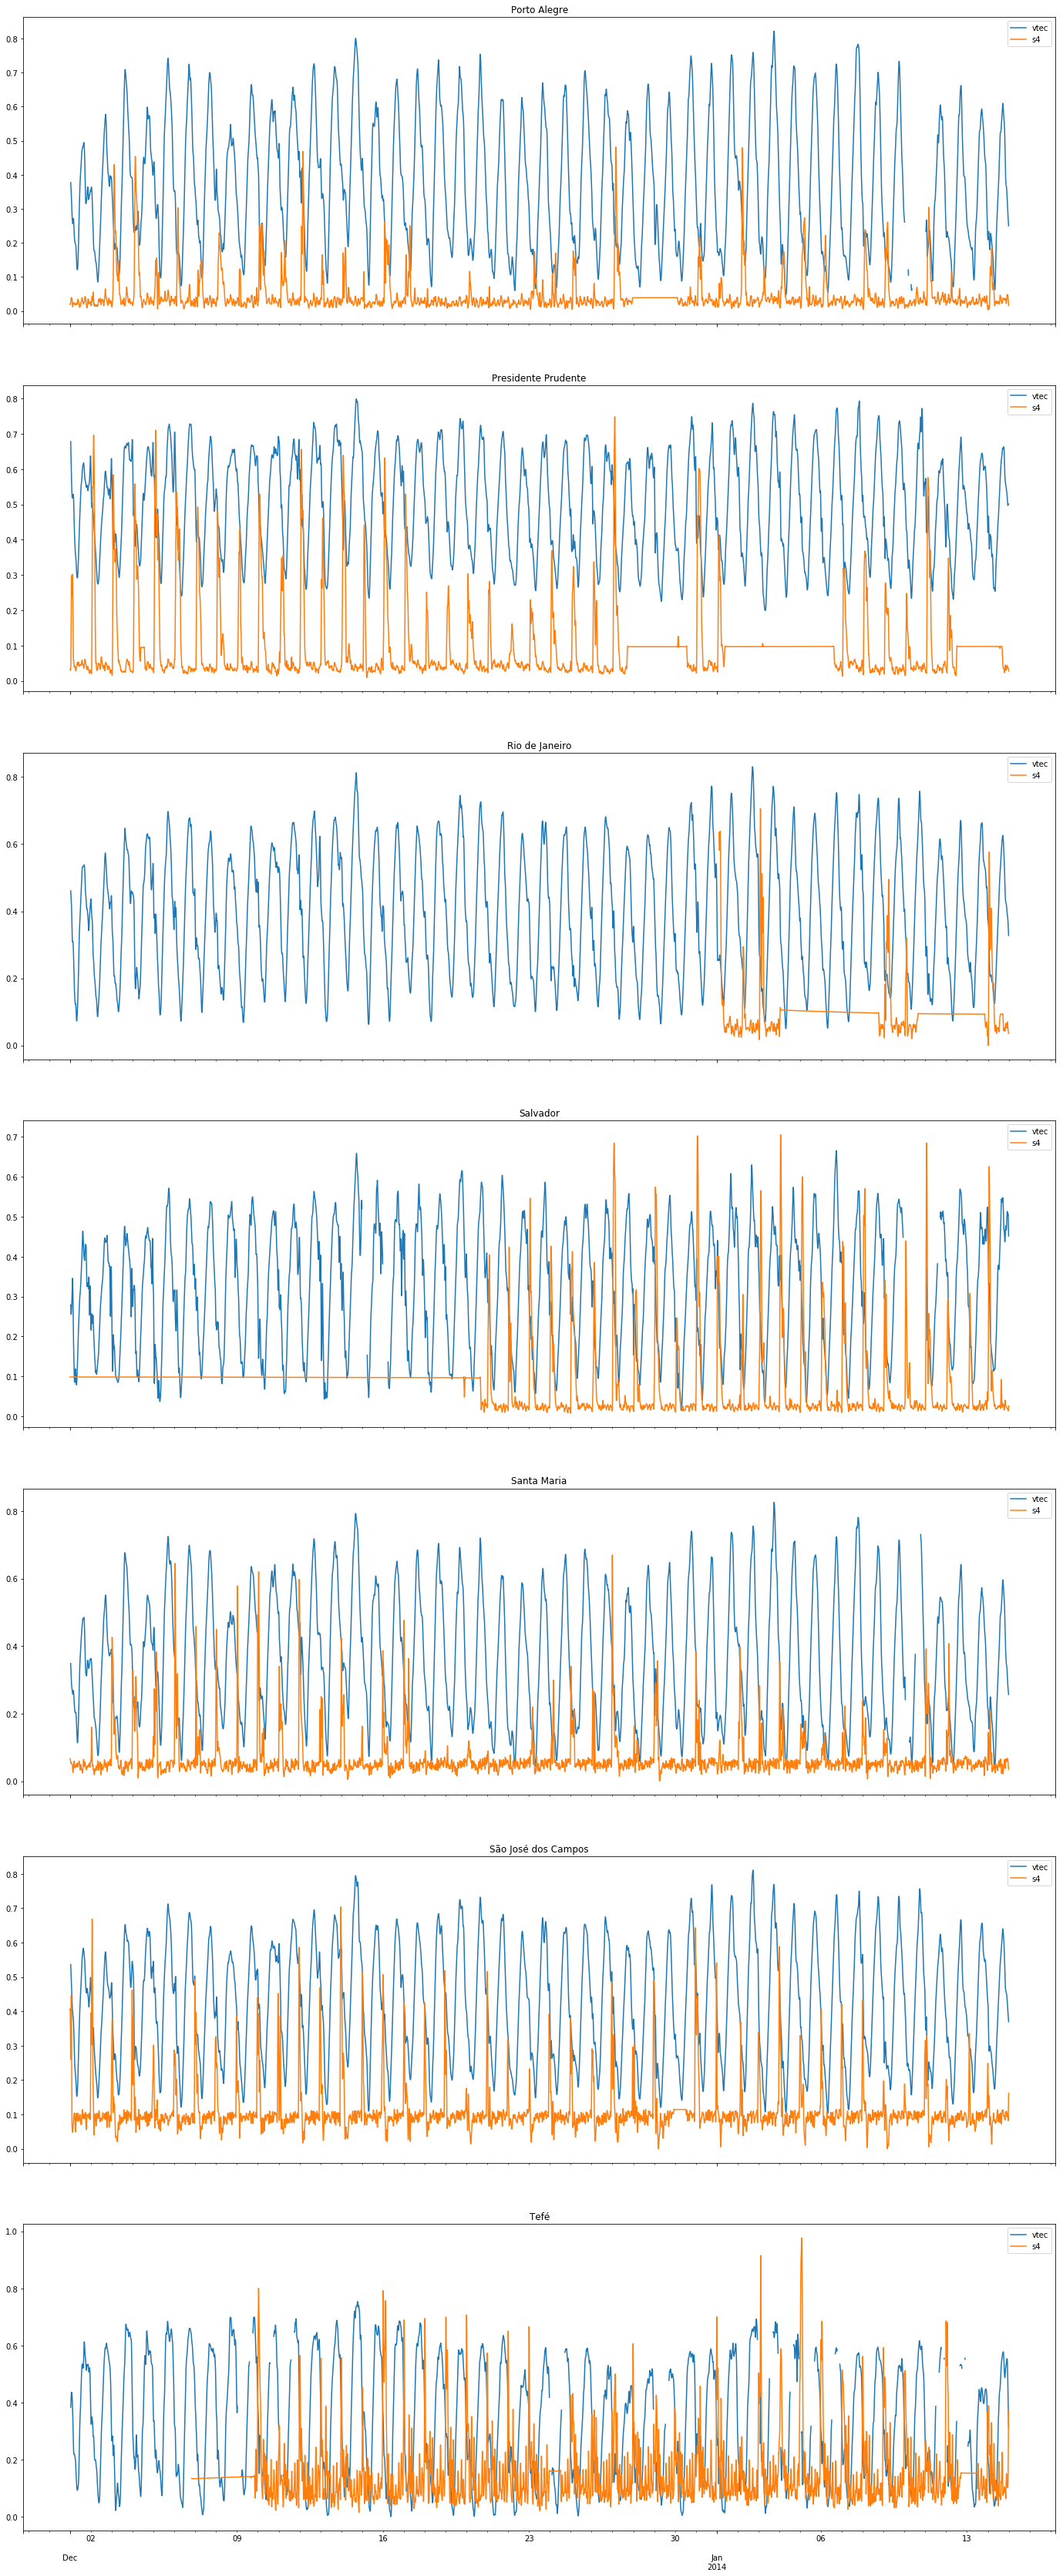

In [14]:
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(groups[2]):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:6480].plot(figsize=(24, 60), ax=ax[idx], label='vtec')
    df_series_s4[i][0:6480].plot(figsize=(24, 60), ax=ax[idx], label='s4')
    ax[idx].set_title(name)
    ax[idx].legend(loc="upper right")
plt.savefig('./images/s4_vtec_complete1.eps', format='eps', dpi=1000)    